# Problema 1: Densidad de Estados

Considere inicialmente el problema de contar microestados, i.e. de conocer la dimensión de la suma que aparece en la expresión de la función partición canónica

$$ Z(\beta, N) = \sum _{r} e^{-\beta E_{r}(N)} $$

para un modelo de Ising 2D donde los espines pueden estar en dos posibles estados |$\uparrow$⟩ o |$\downarrow$⟩

Escriba un programa (comentado) para obtener todos los posibles microestados con sus correspondientes valores de energı́a según el siguiente Hamiltoniano de interacciones entre espı́nes primeros vecinos (con integral de intercambio J = 1)

$$ H = - \sum_{<k,l>} \sigma_{k} \sigma_{l} $$

para sistemas N = 2 × 2, 4 × 4, 6 × 6, etc. con condiciones de frontera periódicas (p.b.c).

Calcule la densidad de estados $\Omega$(E) agrupando los microestados por cantidad según el valor de la energı́a (degenerancia).

Construya varios gráficos de $\Omega$(E) vs. E para al menos 10 valores diferentes de N , ajústelos a una Gaussiana e infiera el comportamiento de la desviación estándar en función de N . Qué concluye?

Con base en lo anterior demuestre la equivalencia entre la suma sobre estados de la función partición canónica y la suma sobre energı́as para un N dado y tres valores de $\beta$ tomando $K_{B}$= 1 con T =2, 2.5 y 3

$$ Z(\beta) = \sum_{\sigma} e^{- \beta E(\sigma)} = \sum_{E} \Omega(E) e^{- \beta E} $$

## 1 
Para N = 4 × 4, haga un barrido sobre un amplio rango de valores de $\beta$, para obtener una gráfica de ⟨E⟩ en función de T , usando $⟨E⟩ = - \frac{\partial}{\partial \beta}ln Z$. Qué concluye?

## 2
Demuestre teóricamente la siguiente expresión del calor especı́fico (a partir de su definición termodinámica) y de la definición de promedios en el ensamble canónico:

$$ c_v = \frac{\beta}{N} \left(⟨E^2⟩ − ⟨E⟩^2 \right) $$

e impleméntela en su programa para obtener curvas del calor especı́fico en función de la temperatura 

Los picos revelan la transición de un estado ferromagnético a uno paramagnético y la posición del pico se corresponde con la temperatura crı́tica o temperatura de Curie $T_C$ . Compare $T_C$ (L) con el valor teórico $T_C (\infty)$ el cual debe averiguar y analice la dependencia de $T_C (L)$ con el tamaño y saque sus propias conclusiones.

In [1]:
#Librerias a usar
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit
import copy
#enconding: utf-8

In [2]:
def gray_code(n):#Funcion que devuelve el codigo de gray

    gray_prueba=np.array([[1],[-1]])#los dos posibles caso cuando solo se tiene un objeto
    E=[]
    """
El gray_prueba se empleara para poder añadir a la iteracion 
necesaria los terminos siguientes,por ejemplo si se tiene 
1 y -1 primero se duplicaran dichos elementos para obtener
1,-1,1,-1 y luego el gray_prueba tiene los elementos siguientes
que son 1,1,-1,-1

El algoritmo implementado en las siguientes lineas hace que
teniendo los valores 1,-1 se dupliquen y luego se añadan
las permutaciones correspondientes para tener todas las
posibles formas, ese metodo se iterara hasta conseguir el buscado
y asi obtener todas las permutaciones sin repeticion del problema
    """    
    if n==1:
    
        gray=gray_prueba
    
    else:
        
        gray=gray_prueba

        for i in range (1,n):
        
            gray=np.append(gray,gray,axis=0)#duplica la itercion anterior del gray code
            gray_prueba=np.append(gray_prueba,-gray_prueba,axis=0)#Termino que se espera añadir
                                                                  #al duplicado
            gray=np.append(gray,gray_prueba,axis=1)#se añade a gray para obtener la i-esima permutacion
                                                
    for i in range(2**n):
       
        if n>2:
            
            suma=gray[i][0]*gray[i][-1]#condicion de frontera periodica
        else:
            suma=0
            
        for j in range(n-1):
            
            suma+= gray[i][j]*gray[i][j+1]
        E.append(-suma)
    return E#se retornan las n permutaciones sin repeticion posibles

In [3]:
def gray2D(n):#Funcion que devuelve el codigo de gray

    gray_prueba=np.array([[1],[-1]])#los dos posibles caso cuando solo se tiene un objeto
    
#El gray_prueba se empleara para poder añadir a la iteracion 
#necesaria los terminos siguientes,por ejemplo si se tiene 
#1 y -1 primero se duplicaran dichos elementos para obtener
#1,-1,1,-1 y luego el gray_prueba tiene los elementos siguientes
#que son 1,1,-1,-1
#
#El algoritmo implementado en las siguientes lineas hace que
#teniendo los valores 1,-1 se dupliquen y luego se añadan
#las permutaciones correspondientes para tener todas las
#posibles formas, ese metodo se iterara hasta conseguir el buscado
#y asi obtener todas las permutaciones sin repeticion del problema
    
    if n==1:
    
        gray=gray_prueba
    
    else:
        
        gray=gray_prueba

        for i in range (1,n*n):
        
            gray=np.append(gray,gray,axis=0)#duplica la itercion anterior del gray code
            gray_prueba=np.append(gray_prueba,-gray_prueba,axis=0)#Termino que se espera añadir
                                                                  #al duplicado
            gray=np.append(gray,gray_prueba,axis=1)#se añade a gray para obtener la i-esima permutacion


    per = []#elemento vacio que se retornara y cuyo valor
            #final seran todas las cajas posibles de lado n
    E=[] #energia
    
    for i in range(2**(n*n)):
        con = []#caja vacia que usara para separar las cajas
        for j in range(n):
        
            con.append(gray[i][j*n:(j+1)*n])#a con se le añaden filas de tamaño n
        per.append(con)#se añade la iesima caja n*n
    
    #Las siguientes lineas entregan la energia con el hamiltoniano dado,
    #los condicionales dentro de los ciclos funcionan como las condiciones de fronter
    #y los casos fuera de ellas
    for i in range (2**(n*n)):
    
        sum=0
    
        for j in range(n):
            
            for k in range(n):

                if k==0 and n!=2:
                    sum+=per[i][j][k]*per[i][j][-1]#si el elemento es el primero de una columna y 
                                                    #la caja no es 2x2 entonces se suma la interaccion
                                                    #con el ultimo elemento de fila 
                                                    
            
                if k<n-1 and j<n-1:#fuera de las condiciones de frontera
                
                    sum+=per[i][j][k]*per[i][j][k+1]
                    sum+=per[i][j][k]*per[i][j+1][k]
            
                elif k==n-1 and j<n-1:#para el ultimo elemento de una fila que sea diferente al ultimo 
                                      #elemento del arreglo se añadeunica interaccion que es con el elemento
                                      #que se encuentra bajo el
                
                    sum+=per[i][j][k]*per[i][j+1][k]
            
                elif k<n-1 and j==n-1 :#en la ultima fila solo se suman terminos a la derecha menos para 
                                       #el primer y ultimo elemento que ya se contemplaron en las condiciones
                                       #de frontera
            
                    sum+=per[i][j][k]*per[i][j][k+1]
                
                if j==0 and n!=2:#la primera fila interactua con la ultima fila mientras se encuentren en la
                                 #misma columna
                    sum+=per[i][j][k]*per[i][-1][k]
    
    
        E.append(-sum)
    
    return E

En el pc usado para realizar el codigo SOLO permite llamar la funcion hasta n=22
despues de dicho valor el kernel muere y por eso solo se trabajo el caso 1D ya que en el calculo
de energia 5x5 mata el kernel

In [4]:
org4x4=gray2D(4)

In [5]:
#plt.hist(gray_code(i),density=False)#por medio del histograma puede verse a agrupacion de microestados
#por nivel de energia

def Omega(n):
    omega=[]
    E=[]
    g=np.array(gray_code(n))
    for i in range(-n,n+1):
        a=len(np.where((g)==i)[0])
        if a !=0:
            E.append(i)
            omega.append(a)

    return E,omega

In [6]:
def Omega2D(n):
    omega=[]
    E=[]
    g=np.array(gray2D(n))
    for i in range(-2*(n*n),2*(n*n)+1):
        a=len(np.where((g)==i)[0])
        if a !=0:
            E.append(i)
            omega.append(a)

    return E,omega

In [7]:
def Gauss(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

/home/s/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/s/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


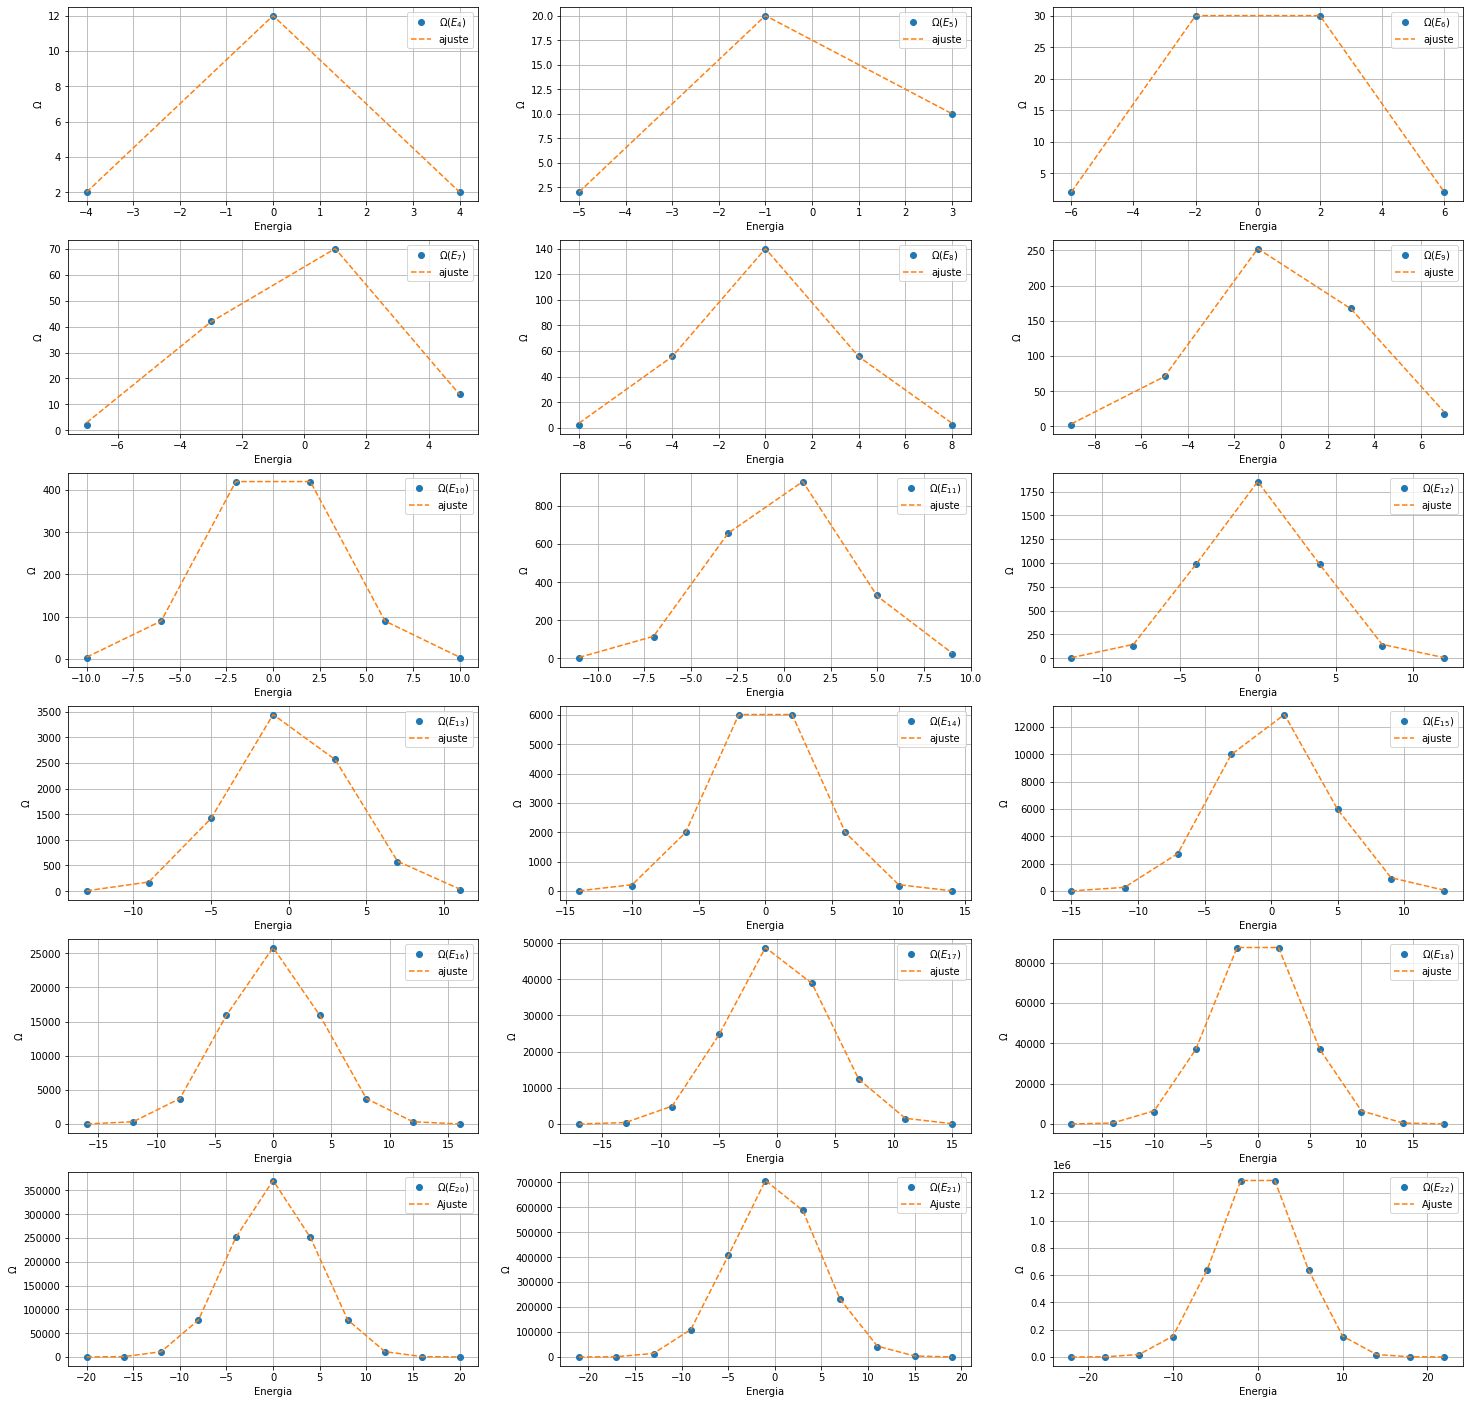

In [8]:
N=[]
sigma=[]

f = plt.figure(figsize=(25,25))
for i in range(4,23):
    if i<19:

        a=Omega(i)
        popt,pcov = curve_fit(Gauss, a[0],a[1])
        
        f.add_subplot(6,3,i-3)
        plt.plot(a[0],a[1],"o",label="$\Omega(E_{%1i})$"%i)
        plt.plot(a[0], Gauss(a[0], *popt), "--", label="ajuste")
        plt.xlabel("Energia")
        plt.ylabel("$\Omega$")
        plt.grid()
        plt.legend()
    if i>19:
        a=Omega(i)
        popt,pcov = curve_fit(Gauss, a[0],a[1])
        
        f.add_subplot(6,3,i-4)
        plt.plot(a[0],a[1],"o",label="$\Omega(E_{%1i})$"%i)
        plt.plot(a[0], Gauss(a[0], *popt), "--", label="Ajuste")
        plt.xlabel("Energia")
        plt.ylabel("$\Omega$")
        plt.grid()
        plt.legend()
        
        
        
    N.append(i)
    sigma.append(popt[-1])

plt.show()
f.savefig("E.jpg")

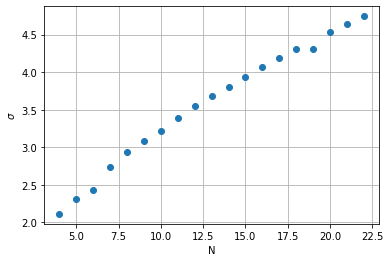

In [9]:
plt.plot(N,abs(np.array(sigma)),"o")
plt.xlabel("N")
plt.ylabel("$\sigma$")
plt.grid()
plt.show()

Como se observa hay una relacion proporcional entre N y $\sigma$

In [10]:
beta=1/np.array([2,2.5,3])

E=gray_code(16)
E1=gray2D(4)

for i in range(len(beta)):
    suma=0
    suma1=0
    for j in range(len(E)):
        suma+=np.exp(-beta[i]*E[j])
    
    for k in range(len(E1)):
        suma1+=np.exp(-beta[i]*E1[k])

    print("Z para cadena lineal de 16 elementos: ",suma)
    print("Z para caja de 4x4: ",suma1)

Z para cadena lineal de 16 elementos:  447840.00940688857
Z para caja de 4x4:  26839013.612229034
Z para cadena lineal de 16 elementos:  228116.295023928
Z para caja de 4x4:  2107668.7226365195
Z para cadena lineal de 16 elementos:  156882.8670289868
Z para caja de 4x4:  585975.6153034146


In [11]:
def Particion(n,b):
    a=Omega(n)
    Z=[]
    for i in range(len(b)):
        suma=0
    
        for j in range(len(a[0])):
            suma+=a[1][j]*np.exp(-b[i]*a[0][j])
        
        Z.append(suma)
    
    return np.array(Z)

In [12]:
def Particion2D(n,b):
    a=Omega2D(n)
    Z=[]
    for i in range(len(b)):
        suma=0
    
        for j in range(len(a[0])):
            suma+=a[1][j]*np.exp(-b[i]*a[0][j])
        
        Z.append(suma)
    
    return np.array(Z)

In [13]:
print ("Z para cadena lineal de 16 elementos: ", Particion(16,beta))
print ("Z para caja de 4x4: ", Particion2D(4,beta))

Z para cadena lineal de 16 elementos:  [447840.00940678 228116.29502392 156882.86702907]
Z para caja de 4x4:  [26839013.6122628   2107668.72263623   585975.61530373]


Sin importar si el modelo es 2D o 1D el resultado no depende del metodo entonces son equivalentes ambos metodos, por otro lado se puede llegar al mismo resultado por otros metodos

In [14]:
T=np.linspace(0.1,8,3000)
BETA=1/T

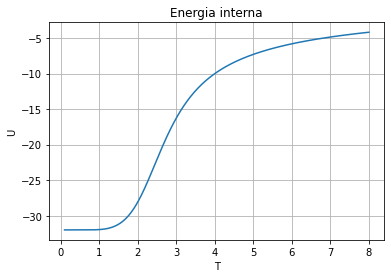

In [15]:
plt.plot(T[1:],-np.diff(np.log(Particion2D(4,BETA)))/np.diff(BETA))
plt.title("Energia interna")
plt.xlabel("T")
plt.ylabel("U")
plt.grid()
plt.savefig("U.jpg")
plt.show()

$$c_v = \frac{C_v}{N} = \left(\frac{\partial U}{\partial t}\right)_V $$

Sabiendo que $U = <E>$ y $<O> = \sum P(E) O$ con $P(E) = \frac{e^{-\beta E}}{Z(E)}$

$U = \frac{\sum E e^{-\beta E}}{Z(E)}$

$ = -\frac{1}{Z} \sum \frac{\partial}{\partial \beta} e^{-\beta E} $

$ = -\frac{1}{Z} \frac{\partial}{\partial \beta} \sum e^{-\beta E} $

$ = -\frac{1}{Z} \frac{\partial}{\partial \beta} Z$

$ = - \frac{\partial}{\partial \beta} lnZ$

$<E^2> = \sum P(E) E^2$

$ = \sum \frac{e^{-\beta E}}{Z(E)} E^2$

$ = \frac{1}{Z} \sum e^{-\beta E} E^2 $

$ = \frac{1}{Z} \frac{\partial^2 Z}{\partial \beta^2} $

$ = \frac{1}{Z} \frac{\partial}{\partial \beta} (-UZ)$

$ -<E^2> = \frac{U}{Z} \frac{\partial}{\partial \beta} (Z) + \frac{\partial}{\partial \beta} U$

$\frac{\partial}{\partial \beta} = \frac{\partial T}{\partial \beta} \frac{\partial}{\partial T}$

$\beta = \frac{1}{K_B T}$

$\frac{\partial T}{\partial \beta} = -\frac{1}{K_B \beta^2}$

$-\left(<E^2> + \frac{U}{Z} \frac{\partial}{\partial \beta} (Z)\right) = -\frac{1}{K_B \beta^2} \frac{\partial U}{\partial T}$

Como $U = -\frac{1}{Z} \frac{\partial}{\partial \beta}$ entonces $<E^2> - U^2 = <E^2> - <E>^2 = \frac{1}{K_B \beta^2} \frac{\partial U}{\partial T} =  \frac{1}{K_B \beta^2} C_V$

$c_V = \frac{C_V}{N} = \frac{K_B \beta^2}{N} <E^2> - <E>^2$

Como se ha usado $K_B=1$ entonces:

$c_V = \frac{C_V}{N} = \frac{\beta^2}{N} <E^2> - <E>^2$

In [16]:
def E2(i,b):

    E2=[]
    a=Omega(i)
    for i in range(len(b)):
        suma=0
        for j in range(len(a[0])):
            suma+=(a[0][j]**2)*a[1][j]*np.exp(-b[i]*a[0][j])
            

        E2.append(suma)
        
    return np.array(E2)

In [17]:
def E22D(i,b):

    E2=[]
    a=Omega2D(i)
    for i in range(len(b)):
        suma=0
        for j in range(len(a[0])):
            suma+=(a[0][j]**2)*a[1][j]*np.exp(-b[i]*a[0][j])
            

        E2.append(suma)
        
    return np.array(E2)

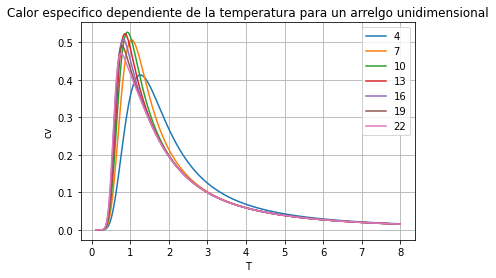

In [18]:
T_C=[]
for i in range(4,23,3):#4,7,10,13,16,19,22
    
    Z=Particion(i,BETA)
    U=-np.diff(np.log(Z))/np.diff(BETA)
    cv=(BETA[1:]**2)*((E2(i,BETA)[1:]/Z[1:])-U**2)/(i)
    T_C.append(T[np.where(cv==np.max(cv))])
    plt.plot(T[1:],cv,label=("%1i"%i))
plt.grid()
plt.title("Calor especifico dependiente de la temperatura para un arrelgo unidimensional")
plt.xlabel("T")
plt.ylabel("cv")
plt.legend()
plt.savefig("CV.jpg")
plt.show()

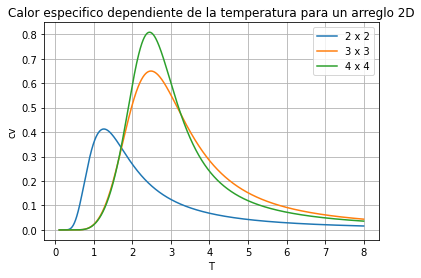

In [19]:
N=[]
T_C2D=[]
for i in range(2,5):#2x2,3x3,4x4
    
    Z=Particion2D(i,BETA)
    U=-np.diff(np.log(Z))/np.diff(BETA)
    cv=(BETA[1:]**2)*((E22D(i,BETA)[1:]/Z[1:])-U**2)/(i*i)
    
    T_C2D.append(T[np.where(cv==np.max(cv))])
    N.append(i*i)
    
    plt.plot(T[1:],cv,label=("%1i x %1i"%(i,i)))
plt.grid()
plt.title("Calor especifico dependiente de la temperatura para un arreglo 2D")
plt.xlabel("T")
plt.ylabel("cv")
plt.legend()
plt.savefig("CV2D.jpg")
plt.show()

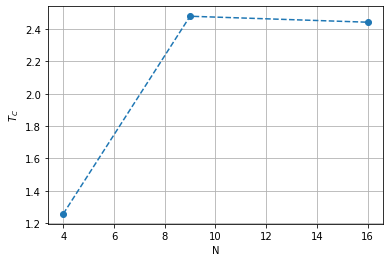

In [20]:
plt.plot(N,T_C2D,"--o")
plt.xlabel("N")
plt.ylabel("$T_C$")
plt.grid()
plt.show()

In [21]:
T_C

[array([1.25641881]),
 array([1.02987663]),
 array([0.91923975]),
 array([0.85338446]),
 array([0.81123708]),
 array([0.77962654]),
 array([0.75855285])]

In [22]:
T_C2D

[array([1.25641881]), array([2.4786929]), array([2.44181394])]

Si bien no se tienen los datos suficientes se observa como al aumentar el numero de espines se disminuye el error entre los $T_C$ obtenido y el $T_C$ teórico 

# Dinámica de poblaciones

Cadenas de Markov de tiempo discreto: Son procesos estocásticos en los que un sistema transita de un estado a otro en un espacio de fase, y las transiciones ocurren en cada paso de tiempo. Las cadenas de Markov se caracterizan por su falta de memoria en el sentido en que la probabilidad de transición de un estado actual al siguiente sólo depende del estado actual y no de los estados previos. Matemáticamente, dada una secuencia de variables aleatorias $X_1$ , $X_2$ , ... , una cadena de Markov debe cumplir la siguiente probabilidad condicionada:

$$ P(X_{n+1} |X_1 , X_2 , . . . , X_n ) = P (X_{n+1} |X_n ) ∀n ≥ 1 $$

donde, las probabilidades de transición $P (X_j |X_i )$ forman una matriz llamada transition matrix. Estas cadenas se pueden usar para modelar la evolución de una población, donde cada estado $X_i (t)$ representa el tamaño de una población en cada paso de tiempo. Suponga que el tamaño de población inicial es de 25 individuos $(X_0 = 25)$, que la población no puede comprender más de N individuos, y que las densidades de probabilidad de nacimiento y muerte están dadas por los parámetros a y b dados en el siguiente programa, el cual debe analizar para entender qué significa cada lı́nea:

## 1

Qué significan las cantidades aX(t) y bX(t). Por qué se compara con números aleatorios?

## 2

Obtenga una gráfica de la población X(t) en función de t para tres valores diferentes de N y paras las tres situaciones siguientes: a) a = b, b) a > b y a < b. Saque sus propias conclusiones de los diferentes comportamientos.

## 3

Vectorice el problema para considerar ntrials cadenas de Markov a la vez para obtener tres gráficas de los histogramas de tamaño de población (distribución de población) para tres tiempos distintos representados en la
variable nsteps list, haciendo uso de la siguiente función:

## 4

Nótese que X es ahora un vector que contiene el tamaño de la población de todos los ensayos para tiempos fijos.

## 5

Analice los histogramas y saque sus propias conclusiones.

In [23]:
nsteps =100 #tiempo
t=np.linspace(0,nsteps-1,nsteps)
def poblacion(N,a,b):
#N tamaño maximo de poblacion
#a  rata de nacimiento
#b rata de muerte

    x =np.zeros(nsteps)
    x[0] =25

    for t in range(nsteps-1):

        if 0<x[t]<N-1:

            birth =np.random.rand() <=(a/N)*x[t]

            death =np.random.rand() <=(b/N)*x[t]

            x[t+1] =x[t] + 1*birth - 1*death #en un instante de tiempo dado los elementos de la
                                             #poblacion seran iguales a los elementos del timepo
                                             #anterior más sus nacimientos y menos sus muertes

        else:#cuando la poblacion muere por completo o se alcanza su maximo entonces en cada instante 
             #se mantendra constante la poblacion
        
            x[t+1] = x[t]
            
    return x

"""
La cantidad ax(t) es la cantidad de nacimientos que habran en la poblacion dado un instante, mientras que
la cantidad bx(t) es la cantidad de muertes que habran en la poblacion dado un instante

Los nacimientos y muertes en la poblacion son fenomenos aleatorios y las cantidades ax y bx se comparan 
con dichos numeros porque no pueden nacer(o morir) más elementos que los que ax(o bx) predicen, en 
otras palabras los valores ax y bx son las cotas superiores en nacimientos y muertes y a lo sumo se puede
llegar a dicha cantidas
"""

'\nLa cantidad ax(t) es la cantidad de nacimientos que habran en la poblacion dado un instante, mientras que\nla cantidad bx(t) es la cantidad de muertes que habran en la poblacion dado un instante\n\nLos nacimientos y muertes en la poblacion son fenomenos aleatorios y las cantidades ax y bx se comparan \ncon dichos numeros porque no pueden nacer(o morir) más elementos que los que ax(o bx) predicen, en \notras palabras los valores ax y bx son las cotas superiores en nacimientos y muertes y a lo sumo se puede\nllegar a dicha cantidas\n'

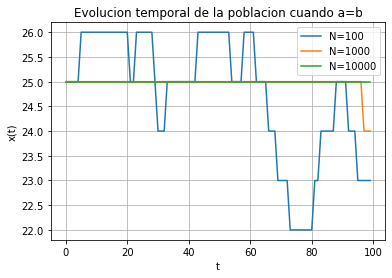

In [24]:
x1=poblacion(100,0.5,0.5)
x2=poblacion(1000,0.5,0.5)
x3=poblacion(10000,0.5,0.5)

plt.plot(t,x1,label= "N=100")
plt.plot(t,x2,label= "N=1000")
plt.plot(t,x3,label= "N=10000")
plt.grid()
plt.legend()
plt.title("Evolucion temporal de la poblacion cuando a=b")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.savefig("a=b.jpg")
plt.show()

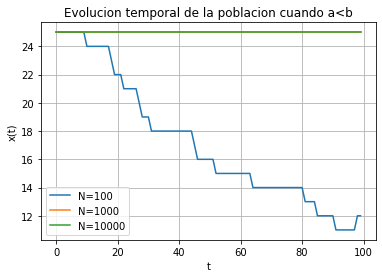

In [25]:
x1=poblacion(100,0.1,0.9)
x2=poblacion(1000,0.1,0.9)
x3=poblacion(10000,0.1,0.9)

plt.plot(t,x1,label= "N=100")
plt.plot(t,x2,label= "N=1000")
plt.plot(t,x3,label= "N=10000")
plt.grid()
plt.legend()
plt.title("Evolucion temporal de la poblacion cuando a<b")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.savefig("a<b.jpg")
plt.show()

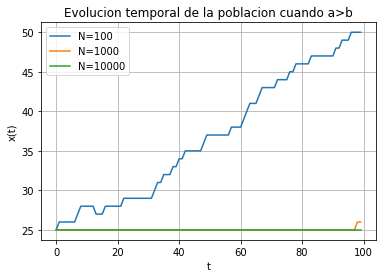

In [26]:
x1=poblacion(100,0.9,0.1)
x2=poblacion(1000,0.9,0.1)
x3=poblacion(10000,0.9,0.1)

plt.plot(t,x1,label= "N=100")
plt.plot(t,x2,label= "N=1000")
plt.plot(t,x3,label= "N=10000")
plt.grid()
plt.legend()
plt.title("Evolucion temporal de la poblacion cuando a>b")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.savefig("a>b.jpg")
plt.show()

In [27]:
ntrials =100
N=100
x=np.random.randint(size=ntrials,low=0,high=N)

a=0.5/N
b=0.5/N

def simulate(x,nsteps):
    X=x

    for _ in range(nsteps-1):
        
        upd =(0<X) & (X<N-1)

        birth =1*(np.random.rand(ntrials)<=a*X)
        death =1*(np.random.rand(ntrials)<=b*X)

        X[upd] +=birth[upd]-death[upd]
        
    return  X

nsteps_list =[10,1000,10000]

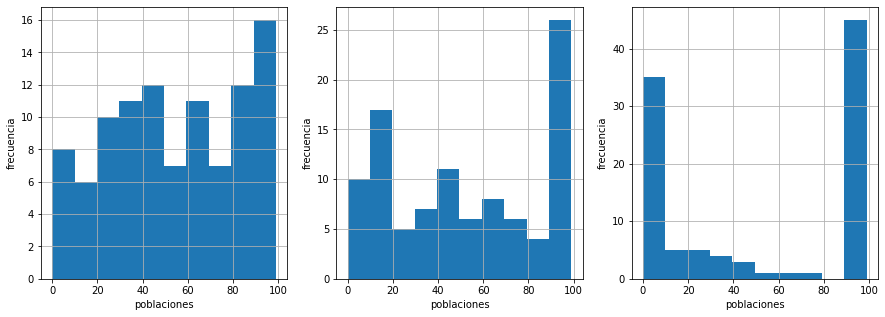

In [28]:
f = plt.figure(figsize=(15,5))
for i in range(len(nsteps_list)):
    x=(simulate(x,nsteps_list[i]))
    f.add_subplot(1,3,i+1)
    plt.hist(x,density=False)
    plt.grid()
    plt.ylabel("frecuencia")
    plt.xlabel("poblaciones")
plt.show()
f.savefig("his.jpg")

Bajo las condiciones dadas se observa que en un tiempo muy grande la mitad de las poblaciones desaparecerán y el resto llegaran a su tope, al igual que en el caso anterior dependiendo del valor de a y b el comportamiento será hacia un extremo o el otro y la velocidad con que llegara a dicho valor.